In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#sns.set_theme(style="white")
plt.style.use('default')

In [2]:
data = pd.read_csv("df_results_2022_05_05.csv",names=["experiment_id","model","auc_indomain","auc_outdomain","n_clusters","datasets_outdomain"])

In [3]:
data = data[(data["auc_indomain"] != "bad_cluster") & (data["auc_outdomain"] != "bad_cluster")]
data = data.astype({"auc_indomain": float, "auc_outdomain": float})

In [4]:
grp_baseline = data[data["model"]=="baseline"].groupby("experiment_id",as_index=False).agg({"auc_indomain":"max"})
grp_baseline = grp_baseline.rename(columns={"auc_indomain": "auc_indomain_max_baseline"})

grp_clusters = data[(data["model"]!="baseline") & (data["model"]!="aggregate")].groupby("experiment_id",as_index=False).agg({"auc_indomain":["max","min"]})
grp_clusters.columns = ["_".join(col_name).rstrip('_') for col_name in grp_clusters.columns.to_flat_index()]
grp_clusters = grp_clusters.rename(columns={"auc_indomain_max": "auc_indomain_max_cluster","auc_indomain_min":"auc_indomain_min_cluster"})

In [5]:
data = data.merge(grp_baseline,on=["experiment_id"])
data = data.merge(grp_clusters,on=["experiment_id"])

In [6]:
data["best_cluster"] = data[["auc_indomain","auc_indomain_max_cluster"]].apply(lambda x: 1 if x[0]==x[1] else 0,axis=1)
data["worst_cluster"] = data[["auc_indomain","auc_indomain_min_cluster"]].apply(lambda x: 1 if x[0]==x[1] else 0,axis=1)
data["cluster>baseline"] = data[["auc_indomain","auc_indomain_max_baseline"]].apply(lambda x: 1 if x[0]>x[1] else 0,axis=1)

In [7]:
data.head(20)

,experiment_id,model,auc_indomain,auc_outdomain,n_clusters,datasets_outdomain,auc_indomain_max_baseline,auc_indomain_max_cluster,auc_indomain_min_cluster,best_cluster,worst_cluster,cluster>baseline
0,0,baseline,0.933969,0.831772,2,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963368,0.878019,0,0,0
1,0,0,0.878019,0.794259,2,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963368,0.878019,0,1,0
2,0,1,0.963368,0.441506,2,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963368,0.878019,1,0,1
3,0,aggregate,0.932882,0.813773,2,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963368,0.878019,0,0,0
4,1,baseline,0.933969,0.831772,3,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963606,0.801476,0,0,0
5,1,0,0.868043,0.661424,3,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963606,0.801476,0,0,0
6,1,1,0.963606,0.470906,3,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963606,0.801476,1,0,1
7,1,2,0.801476,0.724386,3,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963606,0.801476,0,1,0
8,1,aggregate,0.931543,0.817506,3,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.933969,0.963606,0.801476,0,0,0
9,2,baseline,0.997226,0.736373,2,"botometer-feedback-2019.tsv, celebrity-2019.ts...",0.997226,0.997044,0.994052,0,0,0


In [8]:
data["cluster>baseline"].sum(), data["experiment_id"].max()

(1595, 2033)

In [9]:
data[(data["experiment_id"]==2) & (data["best_cluster"]==1) & (data["cluster>baseline"]==1)]["model"].size#.values[0]

0

In [10]:
##get sizes

users = pd.read_csv("users2.csv")
users_cresci = pd.read_csv("users_cresci.csv")
users_total = users.append(users_cresci, ignore_index=True)


In [11]:
for dataset in users_total["dataset"].unique():
    curr = users_total[users_total["dataset"]==dataset]
    print(f"{dataset}   {len(curr)}")

botwiki-2019.tsv   654
botometer-feedback-2019.tsv   461
celebrity-2019.tsv   5793
cresci-rtbust-2019.tsv   653
cresci-stock-2018.tsv   13161
gilani-2017.tsv   2491
pronbots.tsv   1876
vendor-purchased-2019.tsv   736
midterm-2018.tsv   7729
varol-2017.new3   2208
fake_followers.csv   3351
genuine_accounts.csv   3474
social_spambots_1.csv   991
social_spambots_2.csv   3457
social_spambots_3.csv   464
traditional_spambots_1.csv   1000
traditional_spambots_2.csv   100
traditional_spambots_3.csv   403
traditional_spambots_4.csv   1128
E13_users.csv   1481
FSF_users.csv   1169
INT_users.csv   1337
TFP_users.csv   469
TWT_users.csv   845


In [12]:
def bot_distribution(df):
    stats = pd.DataFrame(columns=["dataset","human","bot"])
    for dataset in df["dataset"].unique():
        current_df = df[df["dataset"] == dataset]
        stats.loc[-1] = [dataset,len(current_df[current_df["label"] == "human"]),len(current_df[current_df["label"] == "bot"])]
        stats.index = stats.index + 1
    return stats
                      
stats = bot_distribution(users_total)

tidy = pd.melt(stats, id_vars="dataset", var_name="label", value_name="Size")



##Nice plot for the distribution os labels!
#f, ax = plt.subplots(figsize=(6, 10))
#sns.set_color_codes("pastel")
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.catplot(y='dataset', x='Size', hue='label', data=tidy, kind='bar',orient='h',palette='pastel')

In [13]:
stats_total = stats
stats_total["total"] = stats_total["human"]+stats_total["bot"]
stats_total.sort_values("dataset")

,dataset,human,bot,total
4,E13_users.csv,1481,0,1481
3,FSF_users.csv,0,1169,1169
2,INT_users.csv,0,1337,1337
1,TFP_users.csv,469,0,469
0,TWT_users.csv,0,845,845
22,botometer-feedback-2019.tsv,350,111,461
23,botwiki-2019.tsv,0,654,654
21,celebrity-2019.tsv,5793,0,5793
20,cresci-rtbust-2019.tsv,333,320,653
19,cresci-stock-2018.tsv,6166,6995,13161


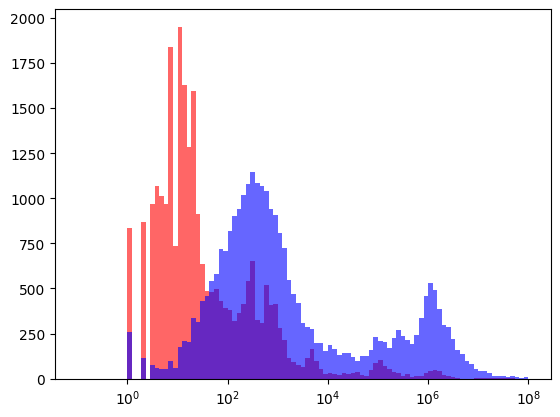

In [14]:
#all datasets

def plot_dist(variable):
    plt.Figure()

    current_df = users_total
    bots = current_df[current_df['label']=='bot']
    humans = current_df[current_df['label']=='human']

    #plt.title(f'Todos os conjuntos de dados')
    #plt.hist([getattr(bots,variable),getattr(humans,variable)],color=['r','b'],stacked=False,alpha=0.6,bins=np.logspace(np.log10(0.1),np.log10(1e8), 100))
    plt.hist(getattr(bots,variable),color='r',stacked=False,alpha=0.6,bins=np.logspace(np.log10(0.1),np.log10(1e8), 100))
    plt.hist(getattr(humans,variable),color='b',stacked=False,alpha=0.6,bins=np.logspace(np.log10(0.1),np.log10(1e8), 100))
    plt.xscale("log")
    

plot_dist('followers_count')

In [15]:
data["num_datasets"] = data["datasets_outdomain"].apply(lambda x: x.count(",")+1)

dataset_dict = dict()
dataset_dict['E13_users.csv'] = 1481
dataset_dict['FSF_users.csv'] = 1169
dataset_dict['INT_users.csv'] = 1337
dataset_dict['TFP_users.csv'] = 469
dataset_dict['TWT_users.csv'] = 845
dataset_dict['botometer-feedback-2019.tsv'] = 461
dataset_dict['botwiki-2019.tsv'] = 654
dataset_dict['celebrity-2019.tsv'] = 5793
dataset_dict['cresci-rtbust-2019.tsv'] = 653
dataset_dict['cresci-stock-2018.tsv'] = 13161
dataset_dict['fake_followers.csv'] = 3351
dataset_dict['genuine_accounts.csv'] = 3474
dataset_dict['gilani-2017.tsv'] = 2491
dataset_dict['midterm-2018.tsv'] = 7729
dataset_dict['pronbots.tsv'] = 1876
dataset_dict['social_spambots_1.csv'] = 991
dataset_dict['social_spambots_2.csv'] = 3457
dataset_dict['social_spambots_3.csv'] = 464
dataset_dict['traditional_spambots_1.csv'] = 1000
dataset_dict['traditional_spambots_2.csv'] = 100
dataset_dict['traditional_spambots_3.csv'] = 403
dataset_dict['traditional_spambots_4.csv'] = 1128
dataset_dict['varol-2017.new3'] = 2208
dataset_dict['vendor-purchased-2019.tsv'] = 736

dataset_dict['cresci_2017'] = dataset_dict['fake_followers.csv']+dataset_dict['genuine_accounts.csv']+dataset_dict['social_spambots_1.csv']+\
                                    dataset_dict['social_spambots_2.csv']+dataset_dict['social_spambots_3.csv']+dataset_dict['traditional_spambots_1.csv']+\
                                    dataset_dict['traditional_spambots_2.csv']+dataset_dict['traditional_spambots_3.csv']+\
                                    dataset_dict['traditional_spambots_4.csv']

dataset_dict['cresci_2015'] =  dataset_dict['E13_users.csv']+dataset_dict['FSF_users.csv']+dataset_dict['INT_users.csv']+\
                                    dataset_dict['TFP_users.csv']+dataset_dict['TWT_users.csv']


del dataset_dict['E13_users.csv']
del dataset_dict['FSF_users.csv']
del dataset_dict['INT_users.csv']
del dataset_dict['TFP_users.csv']
del dataset_dict['TWT_users.csv']

del dataset_dict['fake_followers.csv']
del dataset_dict['genuine_accounts.csv']

del dataset_dict['social_spambots_1.csv']
del dataset_dict['social_spambots_2.csv']
del dataset_dict['social_spambots_3.csv']
del dataset_dict['traditional_spambots_1.csv']
del dataset_dict['traditional_spambots_2.csv']
del dataset_dict['traditional_spambots_3.csv']
del dataset_dict['traditional_spambots_4.csv']




total = 0
for key in dataset_dict.keys():
    total += dataset_dict[key]

dataset_dict["total"] = total
    
data["num_examples_outdomain"] = data["datasets_outdomain"].apply(lambda x: sum([dataset_dict[y.strip()] for y in x.split(",")]))
data["num_examples_indomain"] = dataset_dict["total"] - data["num_examples_outdomain"]

Text(0.5, 1.0, 'AUC')

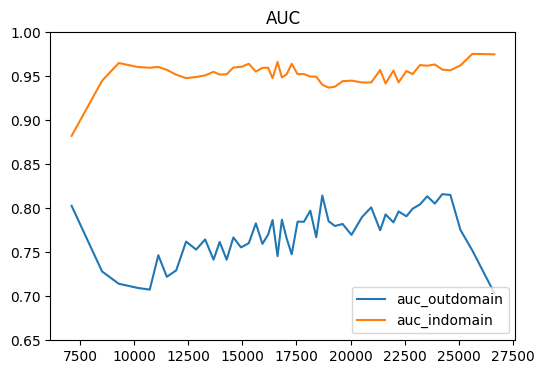

In [16]:
data['num_examples_indomain_quantile'] = pd.qcut(data['num_examples_indomain'], q=50, labels=False)
data['num_examples_indomain_quantile_mean'] = data.groupby('num_examples_indomain_quantile')['num_examples_indomain'].transform('mean')

grp = data[data["model"]=="baseline"].groupby("num_examples_indomain_quantile_mean",as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})

fig,ax = plt.subplots(figsize=(6, 4))
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_outdomain"])
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_indomain"])
ax.legend(["auc_outdomain","auc_indomain"],loc='lower right')
plt.ylim((0.65,1))
ax.set_title("AUC")

In [17]:
grp.mean()

num_examples_indomain_quantile_mean    17541.248972
auc_outdomain                              0.769891
auc_indomain                               0.952907
dtype: float64

Text(0.5, 1.0, 'AUC')

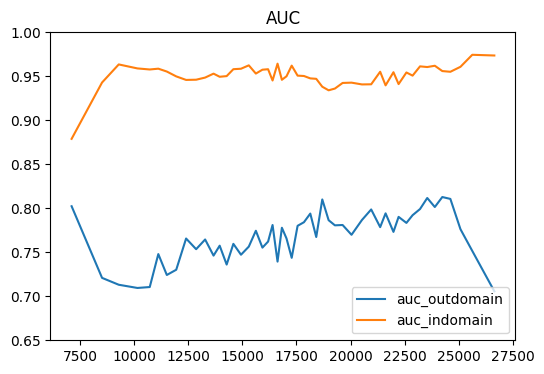

In [18]:
grp = data[data["model"]=="aggregate"].groupby("num_examples_indomain_quantile_mean",as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})

fig,ax = plt.subplots(figsize=(6, 4))
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_outdomain"])
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_indomain"])
ax.legend(["auc_outdomain","auc_indomain"],loc='lower right')
plt.ylim((0.65,1))
ax.set_title("AUC")

In [19]:
grp.mean()

num_examples_indomain_quantile_mean    17541.248972
auc_outdomain                              0.767290
auc_indomain                               0.950883
dtype: float64

In [20]:
#contains dataset in the domain? 
for key in dataset_dict.keys():
    data["contains_"+key] = data["datasets_outdomain"].apply(lambda x: 0 if x.find(key)>-1 else 1)

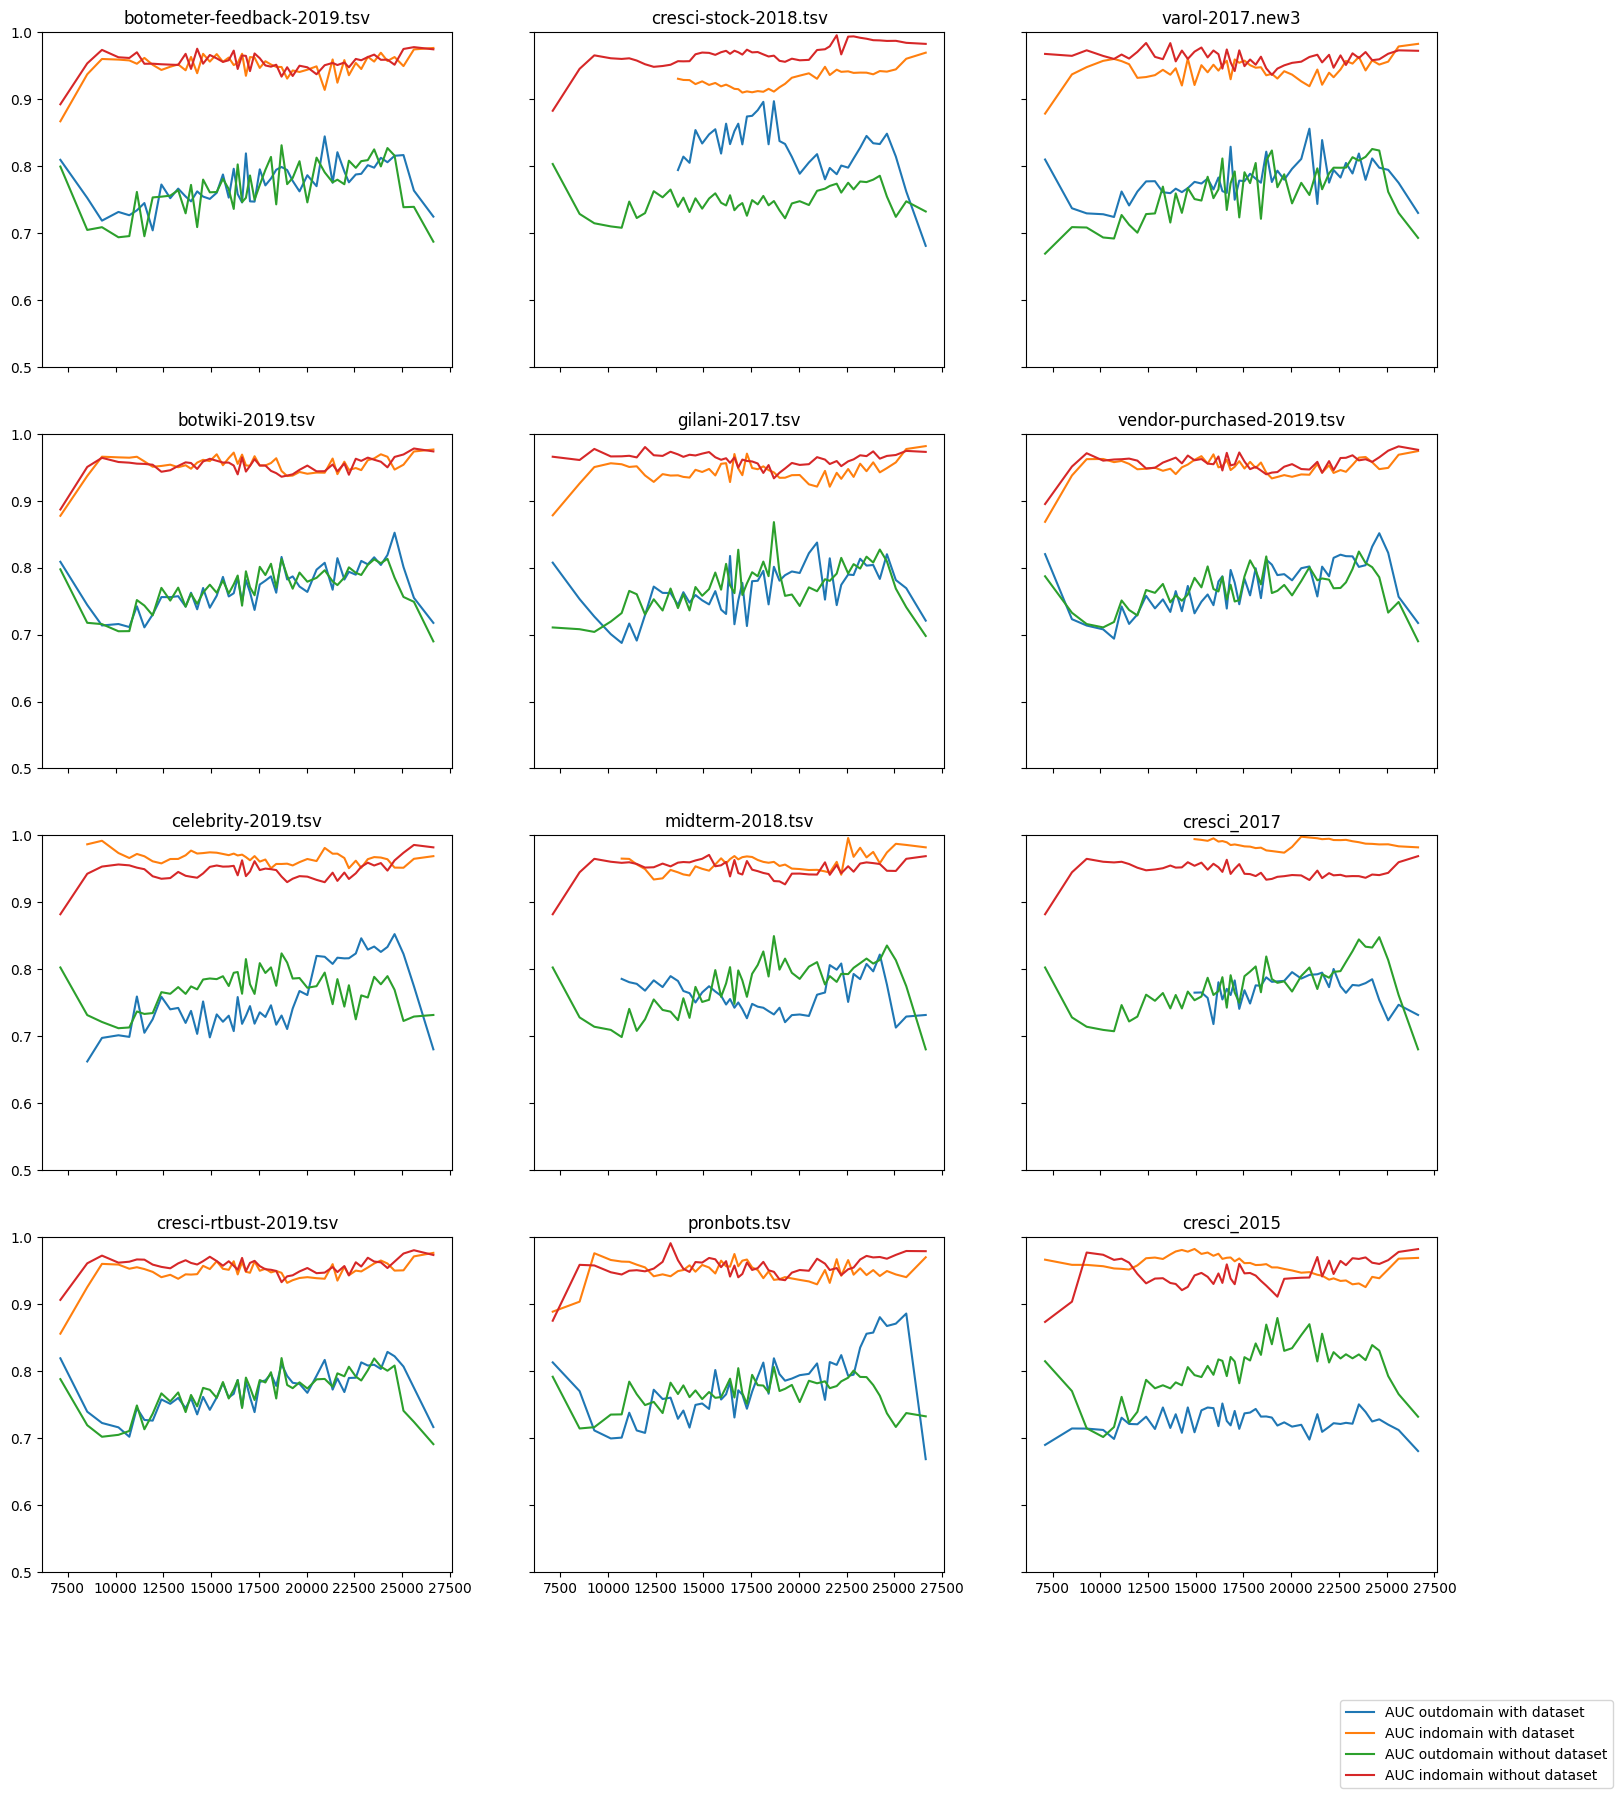

In [21]:
fig,ax = plt.subplots(nrows=4, ncols=3, sharex='all', sharey='all',figsize=(18, 20))
plt.ylim((0.5,1))
row = 0
col = 0 
for key in [x for x in dataset_dict.keys() if x not in ["total"]]:
    grp = data[data["model"]=="baseline"].groupby(["num_examples_indomain_quantile_mean","contains_"+key],as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})
    
    
    grp1 = grp[grp["contains_"+key]==1]
    grp0 = grp[grp["contains_"+key]==0]
    l1, = ax[row,col].plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_outdomain"])
    l2, = ax[row,col].plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_indomain"])
    l3, = ax[row,col].plot(grp0["num_examples_indomain_quantile_mean"],grp0["auc_outdomain"])
    l4, = ax[row,col].plot(grp0["num_examples_indomain_quantile_mean"],grp0["auc_indomain"])
    #ax[row,col].legend(["auc_outdomain1","auc_indomain1","auc_outdomain0","auc_indomain0"])
    ax[row,col].set_title(key)
    
    row +=1
    if row == 4:
        row = 0
        col += 1

fig.legend( (l1,l2,l3,l4),('AUC outdomain with dataset', 'AUC indomain with dataset', 'AUC outdomain without dataset',"AUC indomain without dataset"),'lower right' )


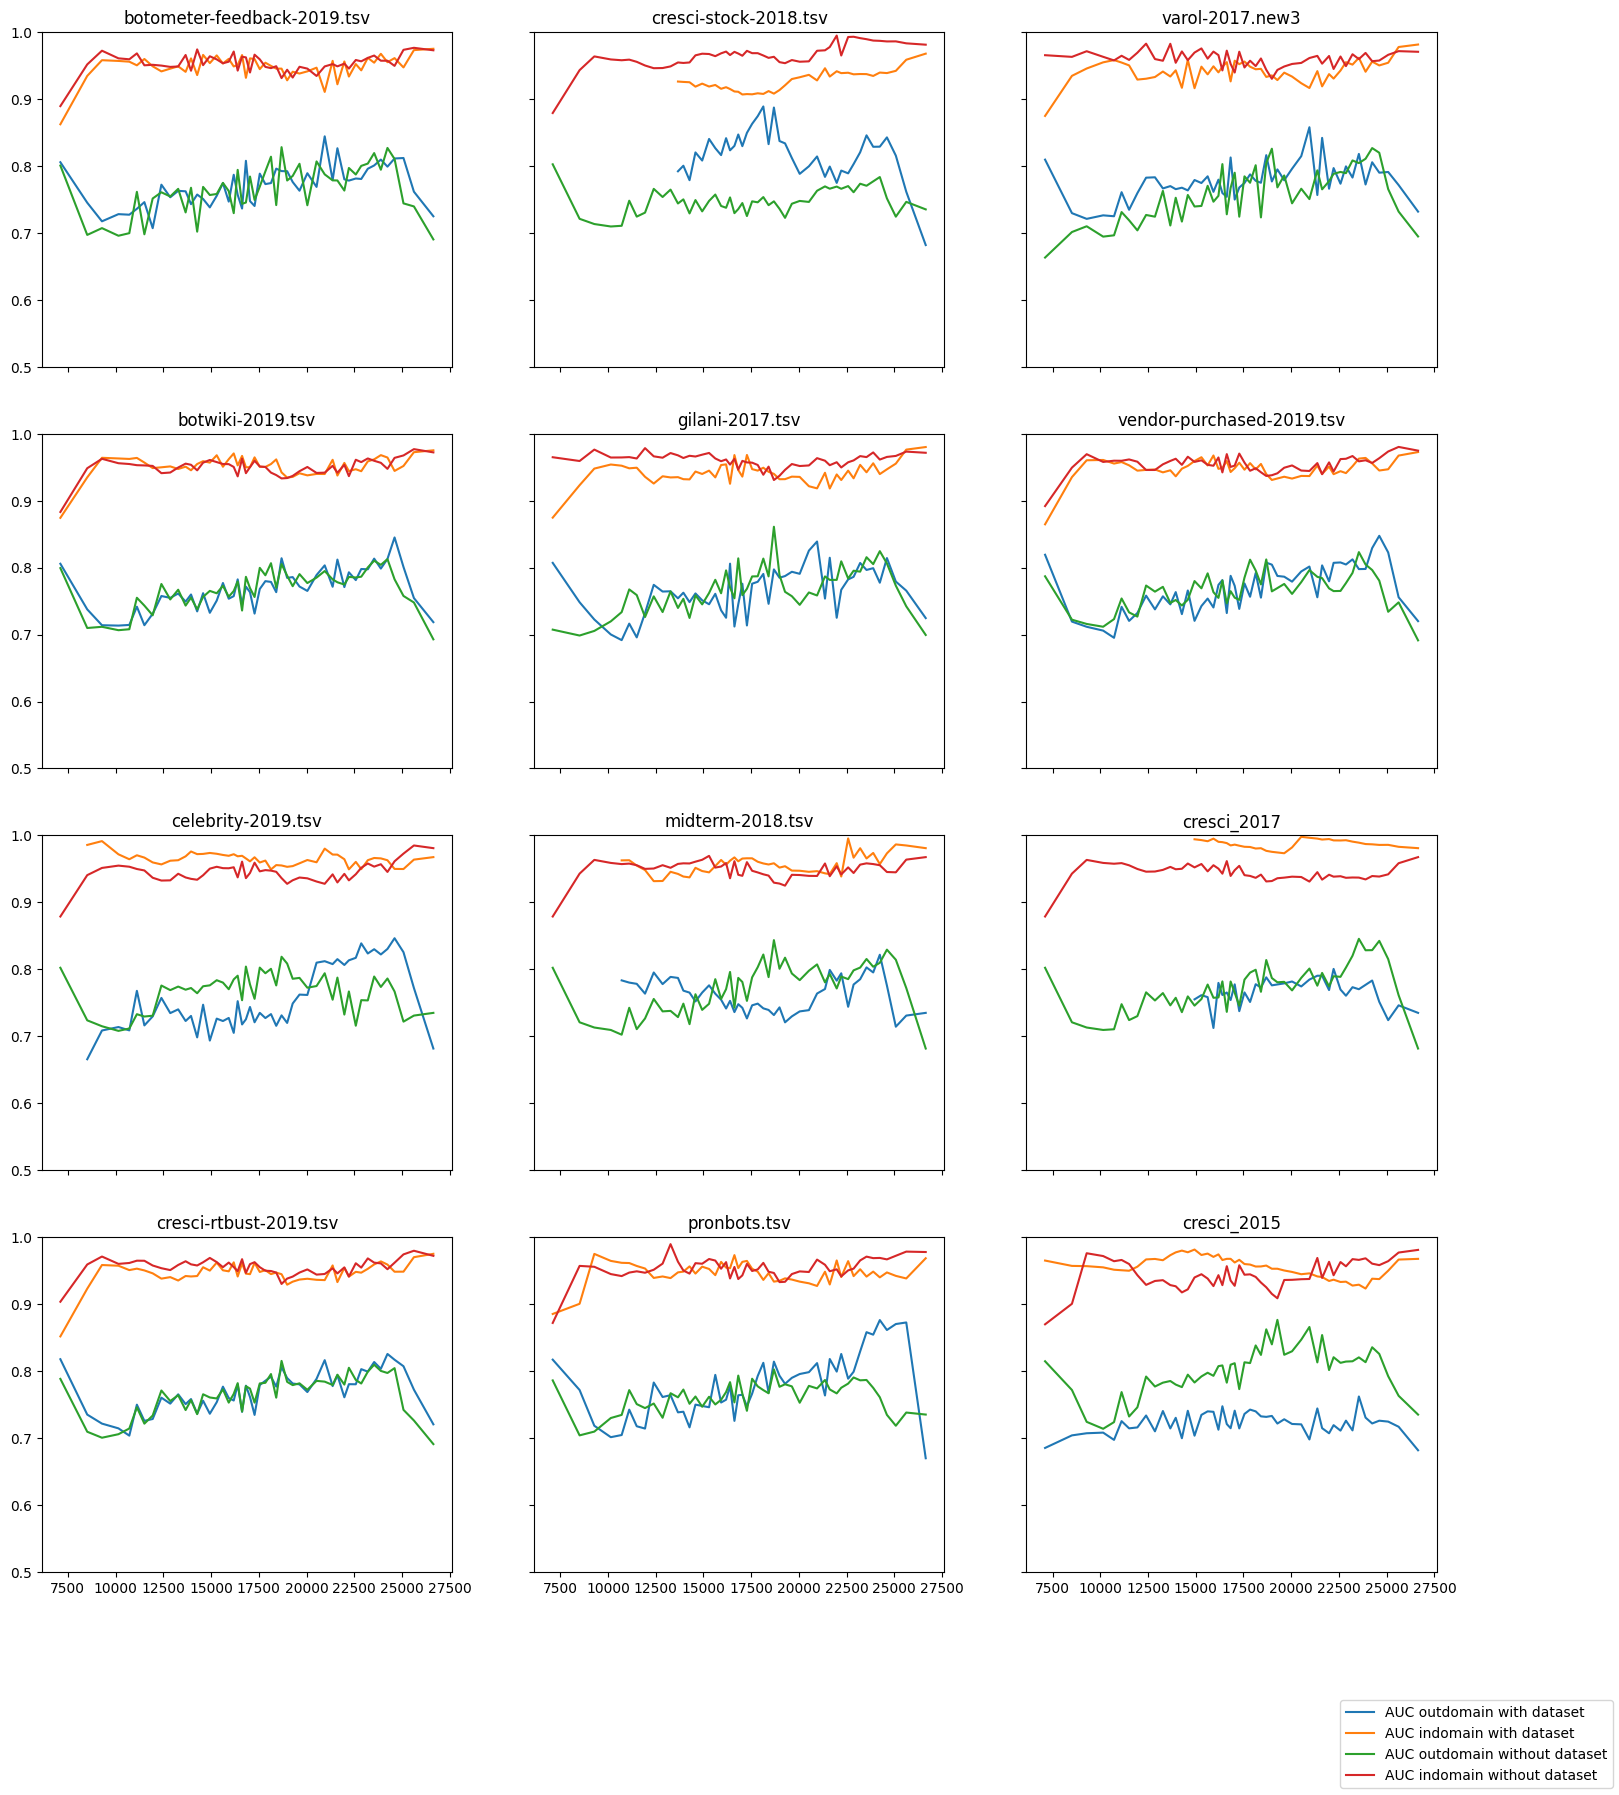

In [22]:
fig,ax = plt.subplots(nrows=4, ncols=3, sharex='all', sharey='all',figsize=(18, 20))
plt.ylim((0.5,1))
row = 0
col = 0 
for key in [x for x in dataset_dict.keys() if x not in ["total"]]:
    grp = data[data["model"]=="aggregate"].groupby(["num_examples_indomain_quantile_mean","contains_"+key],as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})
    
    
    grp1 = grp[grp["contains_"+key]==1]
    grp0 = grp[grp["contains_"+key]==0]
    l1, = ax[row,col].plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_outdomain"])
    l2, = ax[row,col].plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_indomain"])
    l3, = ax[row,col].plot(grp0["num_examples_indomain_quantile_mean"],grp0["auc_outdomain"])
    l4, = ax[row,col].plot(grp0["num_examples_indomain_quantile_mean"],grp0["auc_indomain"])
    #ax[row,col].legend(["auc_outdomain1","auc_indomain1","auc_outdomain0","auc_indomain0"])
    ax[row,col].set_title(key)
    
    row +=1
    if row == 4:
        row = 0
        col += 1

fig.legend( (l1,l2,l3,l4),('AUC outdomain with dataset', 'AUC indomain with dataset', 'AUC outdomain without dataset',"AUC indomain without dataset"),'lower right' )


In [25]:
df = data.set_index(['experiment_id','model']).unstack("model").reset_index()

df2 = pd.Series(df.groupby("experiment_id").apply(lambda row: row['auc_indomain']["aggregate"] - row['auc_indomain']["baseline"]), name='auc_domain_dif').reset_index()[["experiment_id","auc_domain_dif"]]

df3 = df2.join(pd.cut(df2['auc_domain_dif'],bins=[-1,0,0.001,0.01,1]),rsuffix="_bin").groupby("auc_domain_dif_bin").count()
df3["pct"] = df3["auc_domain_dif"] / df3["auc_domain_dif"].sum()
df3

,experiment_id,auc_domain_dif,pct
auc_domain_dif_bin,,,
"(-1.0, 0.0]",1978,1978,0.972468
"(0.0, 0.001]",52,52,0.025565
"(0.001, 0.01]",4,4,0.001967
"(0.01, 1.0]",0,0,0.000000


In [27]:
df2 = pd.Series(df.groupby("experiment_id").apply(lambda row: row['auc_outdomain']["aggregate"] - row['auc_outdomain']["baseline"]), name='auc_domain_dif_out').reset_index()[["experiment_id","auc_domain_dif_out"]]
df3 = df2.join(pd.cut(df2['auc_domain_dif_out'],bins=[-1,0,0.001,0.01,1]),rsuffix="_bin")

df2_1 = pd.Series(df.groupby("experiment_id").apply(lambda row: row['auc_indomain']["aggregate"] - row['auc_indomain']["baseline"]), name='auc_domain_dif').reset_index()[["experiment_id","auc_domain_dif"]]
df3_1 = df2_1.join(pd.cut(df2_1['auc_domain_dif'],bins=[-1,0,0.001,0.01,1]),rsuffix="_bin")

df4 = df3.merge(df3_1,on=["experiment_id"])


df5 = df4.groupby(["auc_domain_dif_bin","auc_domain_dif_out_bin"]).count()

df5["pct"] = df5["auc_domain_dif"] / df5["auc_domain_dif"].sum()
df5["pct_out"] = df5["auc_domain_dif_out"] / df5["auc_domain_dif_out"].sum()
df5["pct"].unstack("auc_domain_dif_out_bin")

auc_domain_dif_out_bin,"(-1.0, 0.0]","(0.0, 0.001]","(0.001, 0.01]","(0.01, 1.0]"
auc_domain_dif_bin,,,,
"(-1.0, 0.0]",0.587512,0.037365,0.194199,0.153392
"(0.0, 0.001]",0.018191,0.000492,0.004916,0.001967
"(0.001, 0.01]",0.001475,NaN,0.000492,NaN
"(0.01, 1.0]",NaN,NaN,NaN,NaN


In [ ]:
#some datasets have a negative effect on the outdomain if you use them on the models! can also be seen in the plots above
rows_list = []
for key in dataset_dict.keys():
    grp = data[data["model"]=="baseline"].groupby(["num_examples_indomain_quantile_mean","contains_"+key],as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})
    dif = grp[grp["contains_"+key]==1].mean().to_frame().T - grp[grp["contains_"+key]==0].mean().to_frame().T
    dict1 = {"dataset":key,"auc_outdomain":dif['auc_outdomain'][0],"auc_indomain":dif['auc_indomain'][0]}
    rows_list.append(dict1)
    
dif_baseline = pd.DataFrame(rows_list)
dif_baseline = dif_baseline.sort_values("auc_indomain")
dif_baseline

In [ ]:
dif_baseline.mean()

In [ ]:
#some datasets have a negative effect on the outdomain if you use them on the models! can also be seen in the plots above
rows_list = []
for key in dataset_dict.keys():
    grp = data[data["model"]=="aggregate"].groupby(["num_examples_indomain_quantile_mean","contains_"+key],as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})
    dif = grp[grp["contains_"+key]==1].mean().to_frame().T - grp[grp["contains_"+key]==0].mean().to_frame().T
    dict1 = {"dataset":key,"auc_outdomain":dif['auc_outdomain'][0],"auc_indomain":dif['auc_indomain'][0]}
    rows_list.append(dict1)
    
dif_cluster = pd.DataFrame(rows_list)
dif_cluster = dif_cluster.sort_values("auc_indomain")
dif_cluster

In [ ]:
dif_cluster.mean()

In [ ]:
dif=dif_baseline.merge(dif_cluster,on=["dataset"],suffixes=("_baseline","_cluster"))
dif["auc_outdomain_dif"] = dif["auc_outdomain_baseline"] - dif["auc_outdomain_cluster"]
dif["auc_indomain_dif"] = dif["auc_indomain_baseline"] - dif["auc_indomain_cluster"]

In [ ]:
dif.corr()

In [ ]:
dif.sort_values("auc_indomain_dif")

In [30]:
#datasets_that_decrease_perf = [x for x in dif[dif["auc_indomain_dif"]>0.00]["dataset"] if x not in ["cresci-stock-2018.tsv"]]
datasets_that_decrease_perf = [x for x in dif[dif["auc_indomain_dif"]>0.0]["dataset"]]
datasets_that_decrease_perf

['cresci-stock-2018.tsv',
 'gilani-2017.tsv',
 'varol-2017.new3',
 'cresci-rtbust-2019.tsv',
 'vendor-purchased-2019.tsv',
 'pronbots.tsv',
 'botometer-feedback-2019.tsv',
 'midterm-2018.tsv']

In [31]:
import numpy as np

data["contains_datasets_that_decrease_perf"] = 0

for key in datasets_that_decrease_perf:
    data["contains_datasets_that_decrease_perf"] = np.maximum(data["contains_datasets_that_decrease_perf"],data["contains_"+key])

Text(0.5, 1.0, 'AUC')

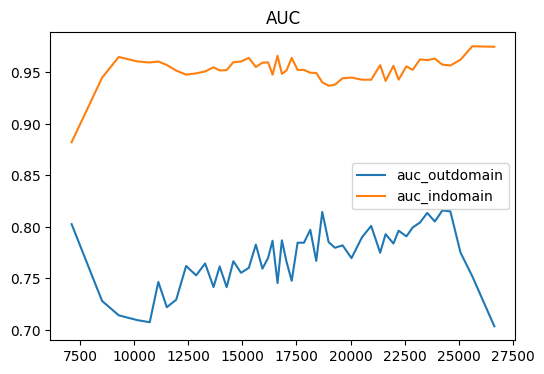

In [32]:
#import matplotlib.pyplot as plt
#data['num_examples_indomain_quantile'] = pd.qcut(data['num_examples_indomain'], q=50, labels=False)
#data['num_examples_indomain_quantile_mean'] = data.groupby('num_examples_indomain_quantile')['num_examples_indomain'].transform('mean')

grp = data[data["model"]=="baseline"].groupby("num_examples_indomain_quantile_mean",as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})

fig,ax = plt.subplots(figsize=(6, 4))
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_outdomain"])
ax.plot(grp["num_examples_indomain_quantile_mean"],grp["auc_indomain"])
ax.legend(["auc_outdomain","auc_indomain"])
ax.set_title("AUC")

In [33]:
grp.mean()

num_examples_indomain_quantile_mean    17541.248972
auc_outdomain                              0.769891
auc_indomain                               0.952907
dtype: float64

Text(0.5, 1.0, 'AUC')

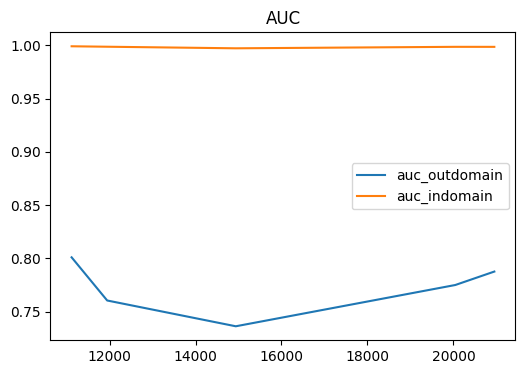

In [34]:
grp1 = data[(data["model"]=="baseline") & ( data["contains_datasets_that_decrease_perf"]==0)].groupby("num_examples_indomain_quantile_mean",as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})

fig,ax = plt.subplots(figsize=(6, 4))
ax.plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_outdomain"])
ax.plot(grp1["num_examples_indomain_quantile_mean"],grp1["auc_indomain"])
ax.legend(["auc_outdomain","auc_indomain"])
ax.set_title("AUC")

Text(0.5, 1.0, 'AUC')

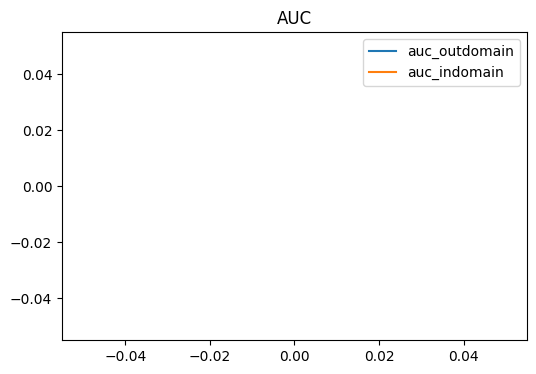

In [60]:
grp2 = data[(data["model"]=="baseline") & ( data["contains_datasets_that_decrease_perf"]==1)].groupby("num_examples_indomain_quantile_mean",as_index=False).agg({"auc_outdomain":"mean","auc_indomain":"mean"})

fig,ax = plt.subplots(figsize=(6, 4))
ax.plot(grp2["num_examples_indomain_quantile_mean"],grp2["auc_outdomain"])
ax.plot(grp2["num_examples_indomain_quantile_mean"],grp2["auc_indomain"])
ax.legend(["auc_outdomain","auc_indomain"])
ax.set_title("AUC")

In [59]:
grp.mean()

num_examples_indomain_quantile_mean    17541.248972
auc_outdomain                              0.769891
auc_indomain                               0.952907
dtype: float64

In [61]:
grp2-grp

,num_examples_indomain_quantile_mean,auc_outdomain,auc_indomain
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
import itertools

def get_valid_combinations_10_percent(users_total,max_datasets_num=8):

    datasets = users_total["dataset"].unique()

    total_len = len(users_total)
    total_len_bot = len(users_total[users_total["label"]=='bot'])
    total_len_human = len(users_total[users_total["label"]=='human'])

    lengths = dict()
    lengths_bot = dict()
    lengths_human = dict()
    for dataset in datasets:
        lengths[dataset] = len(users_total[users_total["dataset"]==dataset])
        lengths_bot[dataset] = len(users_total[(users_total["dataset"]==dataset) & (users_total["label"]=='bot')])
        lengths_human[dataset] = len(users_total[(users_total["dataset"]==dataset) & (users_total["label"]=='human')])

    valid_combinations = list()
    for i in range(2,max_datasets_num):
        for comb in itertools.combinations(datasets,i):
            current_len = 0
            current_bot = 0
            current_human = 0


            for dataset in comb:
                current_len = current_len + lengths[dataset]
                current_bot = current_bot + lengths_bot[dataset]
                current_human = current_human + lengths_human[dataset]

            if (current_len > 0.1 * total_len and current_len < 0.5 * total_len) and (current_bot > 0.1 * total_len_bot and current_bot < 0.5 * total_len_bot) and (current_human > 0.1 * total_len_human and current_human < 0.5 * total_len_human):
                valid_combinations.append(comb)
    
    return valid_combinations

In [ ]:
valid_combinations = get_valid_combinations_10_percent(users_total,max_datasets_num=10)

In [ ]:
len(valid_combinations)